# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#api url
#start_url = "http://api.openweathermap.org/data/2.5/weather?q="
url = "http://api.openweathermap.org/data/2.5/weather?"

#empty data list
data = []

#trackers
city_count = 0
group_count = 1

#api call for loop
for city in cities:
    
    #make city url
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    #add to city count
    city_count = city_count + 1
    
    #create groups of 50 to match provided output
    if (city_count >= 50 and city_count % 50 == 0):
        city_count = 0
        group_count = group_count + 1
    
    #make logger
    print(f'Processing record {city_count} of set {group_count} | {city}')
    
    #make api calls
    try:
        
        #inital call
        city_response = requests.get(city_url).json()
        
        #get columns we need from displays below
        lat = city_response["coord"]["lat"]
        lng = city_response["coord"]["lon"]
        max_temp = city_response["main"]["temp_max"]
        humidity = city_response["main"]["humidity"]
        cloudiness = city_response["clouds"]["all"]
        wind_speed = city_response["wind"]["speed"]
        country = city_response["sys"]["country"]
        date = city_response["dt"]
        
        #add data to list
        data.append({"city" : city,
                     "lat" : lat,
                     "lng" : lng,
                     "max temp" : max_temp,
                     "humidity" : humidity,
                     "cloudiness" : cloudiness,
                     "wind speed" : wind_speed,
                     "country" : country,
                     "date" : date})
        
    #error skip
    except:
        print("City not found. Skipping.")
        pass

#log end
print("data retrieval finished")
    

Processing record 1 of set 1 | hermanus
Processing record 2 of set 1 | dingle
Processing record 3 of set 1 | ayolas
Processing record 4 of set 1 | cheney
Processing record 5 of set 1 | tumannyy
City not found. Skipping.
Processing record 6 of set 1 | mount gambier
Processing record 7 of set 1 | saint-augustin
Processing record 8 of set 1 | bredasdorp
Processing record 9 of set 1 | ixtapa
Processing record 10 of set 1 | ribeira grande
Processing record 11 of set 1 | barrow
Processing record 12 of set 1 | longyearbyen
Processing record 13 of set 1 | lebu
Processing record 14 of set 1 | krasnoyarsk
Processing record 15 of set 1 | cape town
Processing record 16 of set 1 | cap malheureux
Processing record 17 of set 1 | kruisfontein
Processing record 18 of set 1 | provideniya
Processing record 19 of set 1 | belushya guba
City not found. Skipping.
Processing record 20 of set 1 | punta arenas
Processing record 21 of set 1 | tiznit
Processing record 22 of set 1 | mataura
Processing record 23 of

Processing record 39 of set 4 | hvammstangi
City not found. Skipping.
Processing record 40 of set 4 | vaitupu
City not found. Skipping.
Processing record 41 of set 4 | beirut
Processing record 42 of set 4 | huarmey
Processing record 43 of set 4 | itoman
Processing record 44 of set 4 | alekseyevka
Processing record 45 of set 4 | sarandi
Processing record 46 of set 4 | tifton
Processing record 47 of set 4 | laguna
Processing record 48 of set 4 | butaritari
Processing record 49 of set 4 | saint-philippe
Processing record 0 of set 5 | prince george
Processing record 1 of set 5 | arandis
Processing record 2 of set 5 | mar del plata
Processing record 3 of set 5 | marzuq
Processing record 4 of set 5 | tasiilaq
Processing record 5 of set 5 | abaete
Processing record 6 of set 5 | vostok
Processing record 7 of set 5 | moose factory
Processing record 8 of set 5 | lindi
Processing record 9 of set 5 | severo-kurilsk
Processing record 10 of set 5 | palabuhanratu
City not found. Skipping.
Processing 

City not found. Skipping.
Processing record 31 of set 8 | coachella
Processing record 32 of set 8 | troitsko-pechorsk
Processing record 33 of set 8 | banda aceh
Processing record 34 of set 8 | ruthin
Processing record 35 of set 8 | harper
Processing record 36 of set 8 | melito di porto salvo
Processing record 37 of set 8 | hungen
Processing record 38 of set 8 | shwebo
Processing record 39 of set 8 | weyburn
Processing record 40 of set 8 | baihar
Processing record 41 of set 8 | upata
Processing record 42 of set 8 | sur
Processing record 43 of set 8 | walcz
Processing record 44 of set 8 | popondetta
Processing record 45 of set 8 | puerto colombia
Processing record 46 of set 8 | ziarat
Processing record 47 of set 8 | cheuskiny
City not found. Skipping.
Processing record 48 of set 8 | ancud
Processing record 49 of set 8 | am timan
Processing record 0 of set 9 | dukat
Processing record 1 of set 9 | oranjemund
Processing record 2 of set 9 | honiara
Processing record 3 of set 9 | anage
Proces

Processing record 19 of set 12 | rurrenabaque
Processing record 20 of set 12 | darnah
Processing record 21 of set 12 | mocambique
City not found. Skipping.
Processing record 22 of set 12 | kosonsoy
Processing record 23 of set 12 | turek
Processing record 24 of set 12 | paamiut
Processing record 25 of set 12 | berlevag
Processing record 26 of set 12 | puerto leguizamo
Processing record 27 of set 12 | kurumkan
Processing record 28 of set 12 | sioux falls
Processing record 29 of set 12 | la fleche
Processing record 30 of set 12 | dalvik
Processing record 31 of set 12 | redlands
Processing record 32 of set 12 | buala
Processing record 33 of set 12 | severodvinsk
Processing record 34 of set 12 | koping
Processing record 35 of set 12 | sukhobezvodnoye
Processing record 36 of set 12 | yuli
Processing record 37 of set 12 | nguiu
City not found. Skipping.
Processing record 38 of set 12 | khorixas
Processing record 39 of set 12 | poum
Processing record 40 of set 12 | rocha
Processing record 41 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
data_df = pd.DataFrame(data)
data_df

,city,lat,lng,max temp,humidity,cloudiness,wind speed,country,date
0,hermanus,-34.4187,19.2345,287.48,73,100,4.66,ZA,1629136234
1,dingle,10.9995,122.6711,298.04,90,97,2.45,PH,1629136234
2,ayolas,-27.4000,-56.9000,300.98,38,5,2.16,PY,1629136235
3,cheney,47.4874,-117.5758,304.12,24,20,9.26,US,1629136235
4,mount gambier,-37.8333,140.7667,282.10,93,90,3.60,AU,1629136236
...,...,...,...,...,...,...,...,...,...
543,ensley,30.5188,-87.2728,301.81,81,75,1.79,US,1629136433
544,axim,4.8699,-2.2405,298.63,74,98,3.96,GH,1629136434
545,namatanai,-3.6667,152.4333,298.55,82,100,1.17,PG,1629136434
546,mbanza-ngungu,-5.2500,14.8667,300.07,53,91,3.09,CD,1629136434


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#check to see if there are any humidity values above 100
filtered_df = data_df[data_df['humidity'] > 100]
filtered_df
#filtered_df is empty which means there are no cities with humidity values over 100

,city,lat,lng,max temp,humidity,cloudiness,wind speed,country,date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temp (Degrees K)')

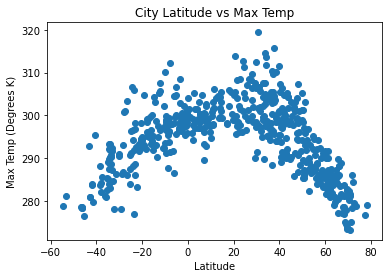

In [32]:
plt.scatter(data_df["lat"], data_df["max temp"])
plt.title("City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Degrees K)")
plt.savefig("temp_plot.png")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

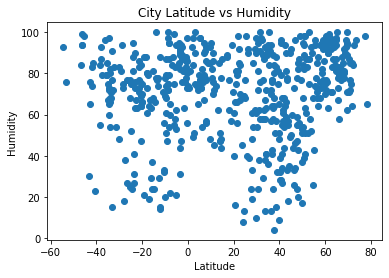

In [33]:
plt.scatter(data_df["lat"], data_df["humidity"])
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("humidity_plot.png")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness %')

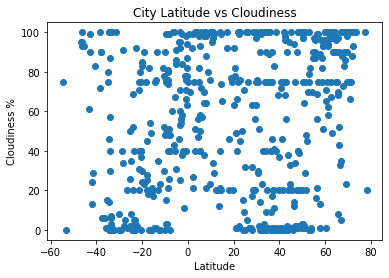

In [35]:
plt.scatter(data_df["lat"], data_df["cloudiness"])
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig("cloudiness.png")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (m/s)')

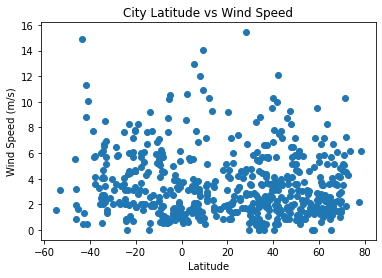

In [36]:
plt.scatter(data_df["lat"], data_df["wind speed"])
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


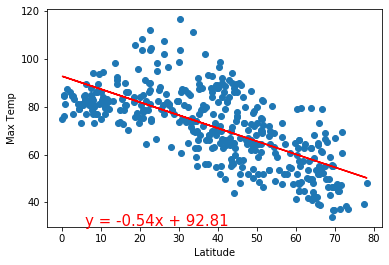

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


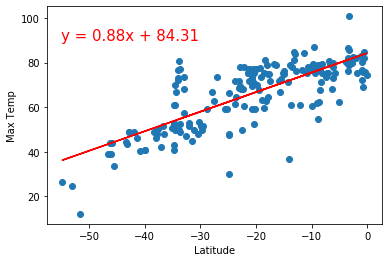

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


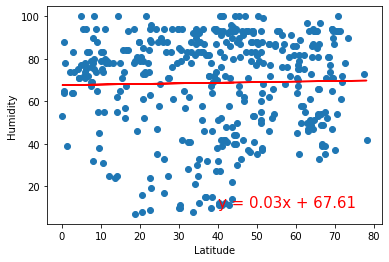

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


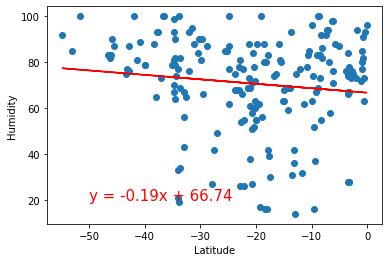

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


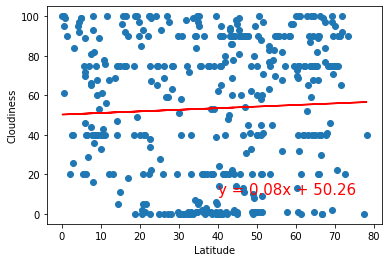

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


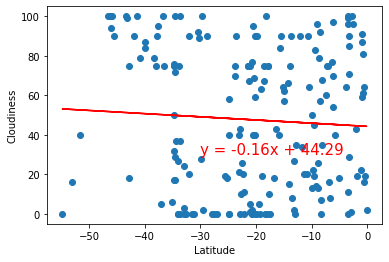

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


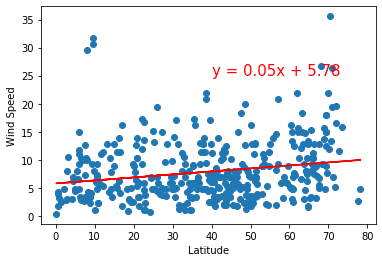

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


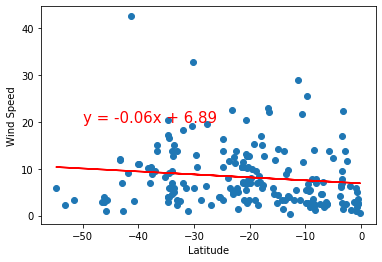